In [2]:
import pandas as pd
from datetime import date
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

## Seattle Airbnbinsights
Reading all tables

In [17]:
df_calendar = pd.read_csv('data\calendar.csv')
df_listings = pd.read_csv('data\listings.csv')
df_reviews = pd.read_csv('data/reviews.csv')

### Creating Dataframe with relevant fields for analysis

In [4]:
df_listings = df_listings[df_listings['review_scores_rating'].notnull()]
df_relevant = df_listings[['host_since',
                                 'review_scores_rating',
                                 'review_scores_value',
                                 'review_scores_checkin',
                                 'review_scores_accuracy',
                                 'review_scores_cleanliness',
                                 'room_type',
                                 'price',
                                 'neighbourhood_group_cleansed',
                                 'bed_type',
                                 'number_of_reviews',
                                 'latitude',
                                 'longitude']]

df_relevant['price'] = df_relevant['price'].str.replace('$','').str.replace(',','').astype('float64')

df_scores_host_dt = df_relevant.copy()

df_scores_host_dt['host_since'] = df_scores_host_dt['host_since'].astype('datetime64')

C:\Users\TCardo12\AppData\Local\Temp\1\ipykernel_18188\4188193052.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_relevant['price'] = df_relevant['price'].str.replace('$','').str.replace(',','').astype('float64')
C:\Users\TCardo12\AppData\Local\Temp\1\ipykernel_18188\4188193052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['price'] = df_relevant['price'].str.replace('$','').str.replace(',','').astype('float64')


In [6]:
df_scores_dist_from_mean = df_scores_host_dt.groupby('neighbourhood_group_cleansed').mean(numeric_only=True) - df_scores_host_dt.mean(numeric_only=True)

df_scores_dist_from_mean

,review_scores_rating,review_scores_value,review_scores_checkin,review_scores_accuracy,review_scores_cleanliness,price,number_of_reviews,latitude,longitude
neighbourhood_group_cleansed,,,,,,,,,
Ballard,0.994417,0.117703,0.114846,0.094178,0.111996,-3.154918,10.129331,0.045979,-0.047075
Beacon Hill,-0.519845,-0.093022,0.048243,-0.044159,-0.090379,-37.880256,5.821318,-0.058423,0.025770
Capitol Hill,-0.354479,-0.103662,-0.009416,-0.064340,-0.131562,2.336544,0.226763,-0.005114,0.016334
Cascade,-2.077724,-0.236861,0.028676,-0.267162,-0.294860,18.535876,-4.905344,0.005458,0.001880
Central Area,1.470142,0.120082,0.047147,0.125363,0.098774,-0.683464,-0.290683,-0.020922,0.030964
Delridge,1.322276,0.224678,0.197907,0.209761,0.182063,-45.433355,7.048502,-0.083397,-0.029280
Downtown,-0.580929,-0.178123,-0.136159,-0.069359,0.010635,27.478116,0.888853,-0.017347,-0.004647
Interbay,-0.761484,0.214421,-0.120042,0.030274,0.221380,-37.135919,-13.084831,0.012793,-0.049901
Lake City,-0.164262,0.119183,0.052577,0.095750,-0.020684,-32.802586,-8.394355,0.083397,0.037706


Text(0.5, 1.0, 'What are the best neighbourhoods by service')

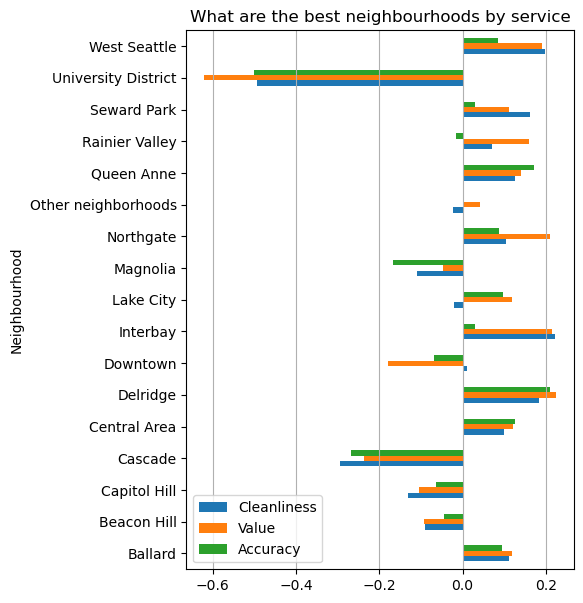

In [14]:
ax = df_scores_dist_from_mean[['review_scores_cleanliness',
                               'review_scores_value',
                               'review_scores_accuracy']].plot(kind='barh',
                                                               figsize=(5,7))\
                                                         .legend(['Cleanliness','Value','Accuracy'])

plt.grid(axis='x')
plt.ylabel('Neighbourhood')
plt.title('What are the best neighbourhoods by service')

Text(0.5, 1.0, 'Difference between total average price and neighbourhood average price')

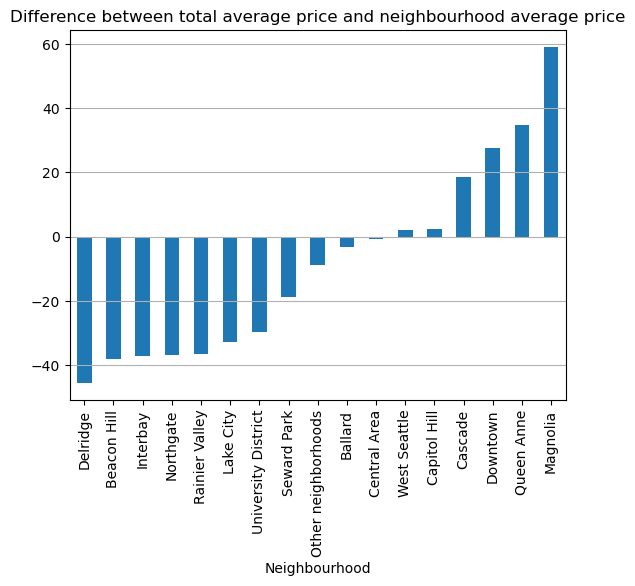

In [13]:
df_scores_dist_from_mean.sort_values(by='price')['price'].plot(kind='bar')
plt.grid(axis='y')
plt.xlabel('Neighbourhood')
plt.title('Difference between total average price and neighbourhood average price')

C:\Users\TCardo12\AppData\Local\Temp\1\ipykernel_18188\3735268180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'] - data['price'].mean()


Text(0.5, 1.0, 'Normalized Airbnb prices over Seattle')

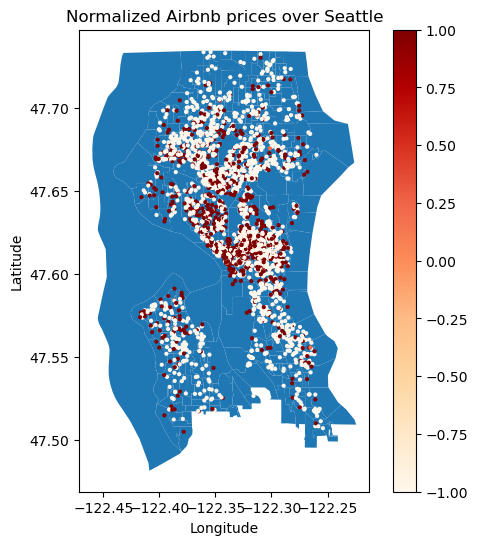

In [11]:
city = gpd.read_file('data\Census_Block_Groups_2010.shp')
ax = city.plot(figsize=(6,6))

data = df_relevant[['longitude','latitude','price']]
data['price'] = data['price'] - data['price'].mean()

plt.scatter(data=data, x='longitude',y='latitude',c='price',s=4,vmin=-1., vmax=1., cmap='OrRd')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Normalized Airbnb prices over Seattle')

In [10]:
data['price'].describe()

count    3.171000e+03
mean    -2.294531e-15
std      9.000717e+01
min     -1.048026e+02
25%     -5.180259e+01
50%     -2.680259e+01
75%      2.319741e+01
max      8.731974e+02
Name: price, dtype: float64